In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from mplhep import *
linestyle_str = [
('solid', 'solid'), # Same as (0, ()) or '-'
('dotted', '.'),# Same as (0, (1, 1)) or '.'
('dashed', '--'),   # Same as '--'
('dashdot', '-.')]  # Same as '-.'
from matplotlib.pyplot import *
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='Times New Roman')
from  matplotlib import *
mpl.rcParams['figure.figsize'] = (10,6)
import sympy as sy
sy.init_printing()
from sympy import *
%matplotlib inline

In [2]:
MSd_list = list(range(500, 4000, 500))
Sa_list = [0.2]
cw, MSd, Sa, Ca = symbols('cw MSd Sa Ca')
MW = 80.4
MZ = 91.2
MU = 0.00255
MC = 1.27
MT = 172
MD = 0.00504
MS = 0.101
MB = 4.7
vev = 246
sw = sy.sqrt(1-cw**2)
yt = np.sqrt(2)*MT/vev
MTA = 1.777
ytau = MTA*sy.sqrt(2)/vev
cw = MW/MZ
ee = (2*MW*sw)/vev
gqA =0
MZp = 2000
Mchi = 65
gchi = 1
ychi = 1
Mh = 125
vev2 = MZp/(2*gchi)
#gqL = (gqV + gqA)/2
#gqR = (gqV - gqA)/2
gZp = 1 
gsd = -2*gchi

In [3]:
def BRSd(MSd_list, Sa_list):
    BRqq= []
    BRXdXd = []
    Sdqq_values = []
    SdXdXd_values = []
    SdtotalW_values = []
    Ca = sy.sqrt(1-Sa**2)
    Sdhh = ((1 + (2*Mh**2)/MSd**2)**2*MSd*sy.sqrt((1 - (4*Mh**2)/MSd**2)*MSd**4)*Ca**2*Sa**2*(vev2*Ca + vev*Sa)**2)/(32*sy.pi*vev**2*vev2**2)
    SdXdXd = ((-4*Ca**2*Mchi**2*ychi**2 + Ca**2*MSd**2*ychi**2)*sy.sqrt(-4*Mchi**2*MSd**2 + MSd**4))/(32*sy.pi*abs(MSd)**3)
    Sdtata = ((MSd**2*Sa**2*ytau**2 - 4*MTA**2*Sa**2*ytau**2)*sy.sqrt(MSd**4 - 4*MSd**2*MTA**2))/(16*sy.pi*abs(MSd)**3)
    Sdtt = ((3*MSd**2*Sa**2*yt**2 - 12*MT**2*Sa**2*yt**2)*sy.sqrt(MSd**4 - 4*MSd**2*MT**2))/(16*sy.pi*abs(MSd)**3)
    SdWW = (((3*ee**4*Sa**2*vev**2)/(4*sw**4) + (ee**4*MSd**4*Sa**2*vev**2)/(16*MW**4*sw**4) - (ee**4*MSd**2*Sa**2*vev**2)/(4*MW**2*sw**4))*sy.sqrt(MSd**4 - 4*MSd**2*MW**2))/(16*sy.pi*abs(MSd)**3)
    SZpZp = ((192*Ca**2*gchi**4*gZp**4*vev2**2 + (16*Ca**2*gchi**4*gZp**4*MSd**4*vev2**2)/MZp**4 - (64*Ca**2*gchi**4*gZp**4*MSd**2*vev2**2)/MZp**2)*sy.sqrt(MSd**4 - 4*MSd**2*MZp**2))/(32*sy.pi*abs(MSd)**3)
    SdZZ = -1/32*(MW**4*sy.sqrt(MSd**4*(1 - (4*MZ**2)/MSd**2))*(-12*MZ**4 + MSd**4*(-1 + (4*MZ**2)/MSd**2))*Sa**2*(cw**2 + sw**2)**4)/(cw**4*MZ**4*sy.pi*vev**2*abs(MSd)**3)
    #Sdtata = simplify(simplify( Stata ).subs(MTA**2, X *MSd**2)).subs(X, MTA**2 /MSd**2)
    #Sdtt = simplify(simplify( Stt ).subs(MT**2, X *MSd**2)).subs(X, MT**2 /MSd**2)
    #SdXdXd = simplify(simplify( SXdXd ).subs(Mchi**2, X *MSd**2)).subs(X, Mchi**2 /MSd**2)
    #SdWW = simplify(simplify( SWW  ).subs(MW**2, X *MSd**2)).subs(X, MW**2 /MSd**2)
    #SdZZ = simplify(simplify( SZZ ).subs(MZ**2, X *MSd**2)).subs(X, MZ**2 /MSd**2)
    #Sdhh = simplify(simplify(Shh  ).subs(Mh**2, X *MSd**2)).subs(X, Mh**2 /MSd**2)    
    Sdqq =  Sdtt 
    SdtotalW = Sdqq + SdXdXd + SdWW + SdZZ + Sdhh + Sdtata
    
    for MSd_value in MSd_list:
        for Sa_value in Sa_list:
            Sdqq_value = Sdqq.subs({MSd: MSd_value, Sa: Sa_value}).evalf()
            SdtotalW_value = SdtotalW.subs({MSd: MSd_value, Sa: Sa_value}).evalf()
            SdXdXd_value = SdXdXd.subs({MSd: MSd_value}).evalf()
            Sdqq_values.append(Sdqq_value)
            SdtotalW_values.append(SdtotalW_value)
            SdXdXd_values.append(SdXdXd_value)
            BRqq.append((Sdqq_value / SdtotalW_value).evalf())
            BRXdXd.append((SdXdXd_value / SdtotalW_value).evalf())
    return BRqq, BRXdXd, Sdqq_values, SdtotalW_values, SdXdXd_values
BRqq_list, BRXdXd_list, Sdqq_list, SdtotalW_list, SdXdXd_list = BRSd(MSd_list, Sa_list)
BRqq_list
#Sdqq_list
#SdtotalW_list
#SdXdXd_list
#BRXdXd_list

UnboundLocalError: local variable 'Ca' referenced before assignment

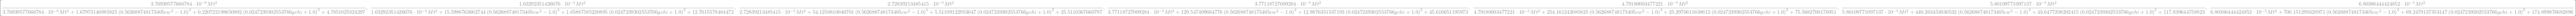

In [ ]:
Sa_list = [0.1]
BRqq_list2, BRXdXd_list2, Sdqq_list2, SdtotalW_list2, SdXdXd_list2 = BRSd(MSd_list, Sa_list)
BRqq_list2

In [ ]:
Sa_list = [0.15]
BRqq_list3, BRXdXd_list3, Sdqq_list3, SdtotalW_list3, SdXdXd_list3 = BRSd(MSd_list, Sa_list)

TypeError: can't convert expression to float

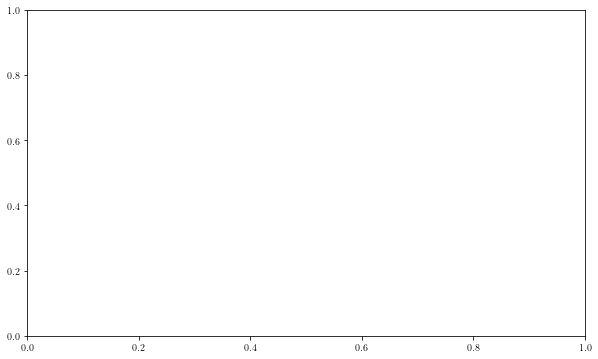

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(MSd_list, BRqq_list, label=r'$S_a} = $ 0.25 ', color='blue', linestyle='solid')
plt.plot(MSd_list, BRqq_list2, label=r'$S_a} = $ 0.24', color='magenta', linestyle='solid')
plt.plot(MSd_list, BRqq_list3, label=r'$S_a} = 0.23$', color='yellowgreen', linestyle='solid')
plt.xlabel(r'$M_{S}$ [GeV]')
plt.ylabel(r'BR($Z^{\prime} \rightarrow q\bar{q}$)')
plt.yscale('log')
plt.legend()
plt.show()
